In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [17]:
school=pd.read_csv('School_Attendance_by_Student_Group.csv').dropna(how='any')

In [7]:
school.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1742 entries, 1 to 2018
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District code                             1742 non-null   object 
 1   District name                             1742 non-null   object 
 2   Category                                  1742 non-null   object 
 3   Student group                             1742 non-null   object 
 4   2021-2022 student count - year to date    1742 non-null   int64  
 5   2021-2022 attendance rate - year to date  1742 non-null   float64
 6   2020-2021 student count                   1742 non-null   float64
 7   2020-2021 attendance rate                 1742 non-null   float64
 8   2019-2020 student count                   1742 non-null   float64
 9   2019-2020 attendance rate                 1742 non-null   float64
 10  Reporting period                         

In [8]:
school.nunique()

District code                               199
District name                               199
Category                                      6
Student group                                12
2021-2022 student count - year to date      961
2021-2022 attendance rate - year to date    798
2020-2021 student count                     970
2020-2021 attendance rate                   933
2019-2020 student count                     981
2019-2020 attendance rate                   541
Reporting period                              1
Date update                                   1
dtype: int64

In [18]:
school=school.drop(['District code','Date update','Reporting period'], axis=1)

In [19]:
school=school.rename(columns={'2021-2022 student count - year to date':'2021-2022 student count','2021-2022 attendance rate - year to date':'2021-2022 attendance rate'})

In [21]:
school.nunique()

District name                199
Category                       6
Student group                 12
2021-2022 student count      961
2021-2022 attendance rate    798
2020-2021 student count      970
2020-2021 attendance rate    933
2019-2020 student count      981
2019-2020 attendance rate    541
dtype: int64

In [22]:
school.head(3)

,District name,Category,Student group,2021-2022 student count,2021-2022 attendance rate,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate
1,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884
2,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277
3,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314


In [60]:
students_category_2021_2022=school.groupby(by=['Category'])['2021-2022 student count'].sum()
students_category_2020_2021=school.groupby(by=['Category'])['2020-2021 student count'].sum()
students_category_2019_2020=school.groupby(by=['Category'])['2019-2020 student count'].sum()
students_category_2019_2020

Category
English Learners                90193.0
Free/Reduced Lunch             878524.0
High Needs                    1016139.0
Homelessness                     6474.0
Race/Ethnicity                1011765.0
Students With Disabilities     160200.0
Name: 2019-2020 student count, dtype: float64

In [61]:
students_category_2019_2020=pd.DataFrame({'category':students_category_2019_2020.index, 'number':students_category_2019_2020.values })
students_category_2020_2021=pd.DataFrame({'category':students_category_2020_2021.index, 'number':students_category_2020_2021.values })
students_category_2021_2022=pd.DataFrame({'category':students_category_2021_2022.index, 'number':students_category_2021_2022.values })

students_category_2019_2020

,category,number
0,English Learners,90193.0
1,Free/Reduced Lunch,878524.0
2,High Needs,1016139.0
3,Homelessness,6474.0
4,Race/Ethnicity,1011765.0
5,Students With Disabilities,160200.0


In [62]:
students_category_2020_2021

,category,number
0,English Learners,80678.0
1,Free/Reduced Lunch,822235.0
2,High Needs,974864.0
3,Homelessness,2946.0
4,Race/Ethnicity,987338.0
5,Students With Disabilities,152557.0


In [63]:
students_category_2019_2020.insert(0,'year',2019)
students_category_2020_2021.insert(0,'year',2020)
students_category_2021_2022.insert(0,'year',2021)

In [64]:
students_category_2020_2021

,year,category,number
0,2020,English Learners,80678.0
1,2020,Free/Reduced Lunch,822235.0
2,2020,High Needs,974864.0
3,2020,Homelessness,2946.0
4,2020,Race/Ethnicity,987338.0
5,2020,Students With Disabilities,152557.0


In [65]:
students_category_2021_2022

,year,category,number
0,2021,English Learners,86370
1,2021,Free/Reduced Lunch,788433
2,2021,High Needs,977320
3,2021,Homelessness,3056
4,2021,Race/Ethnicity,994440
5,2021,Students With Disabilities,156229


In [66]:
total_students_category = pd.DataFrame(columns=['year','category','number'])

In [67]:
total_students_category=pd.concat([total_students_category, students_category_2019_2020,students_category_2020_2021,students_category_2021_2022],ignore_index=True)
total_students_category

,year,category,number
0,2019,English Learners,90193.0
1,2019,Free/Reduced Lunch,878524.0
2,2019,High Needs,1016139.0
3,2019,Homelessness,6474.0
4,2019,Race/Ethnicity,1011765.0
5,2019,Students With Disabilities,160200.0
6,2020,English Learners,80678.0
7,2020,Free/Reduced Lunch,822235.0
8,2020,High Needs,974864.0
9,2020,Homelessness,2946.0


In [68]:
total_students_category=total_students_category.pivot(index='year',columns='category',values='number')
total_students_category

category,English Learners,Free/Reduced Lunch,High Needs,Homelessness,Race/Ethnicity,Students With Disabilities
year,,,,,,
2019,90193.0,878524.0,1016139.0,6474.0,1011765.0,160200.0
2020,80678.0,822235.0,974864.0,2946.0,987338.0,152557.0
2021,86370.0,788433.0,977320.0,3056.0,994440.0,156229.0


<Axes: xlabel='category', ylabel='year'>

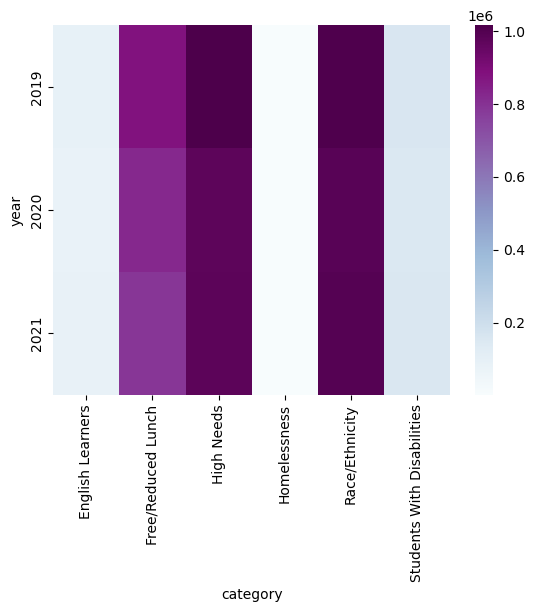

In [70]:
sns.heatmap(total_students_category, cmap='BuPu')

In [71]:
school.head(3)

,District name,Category,Student group,2021-2022 student count,2021-2022 attendance rate,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate
1,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884
2,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277
3,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314


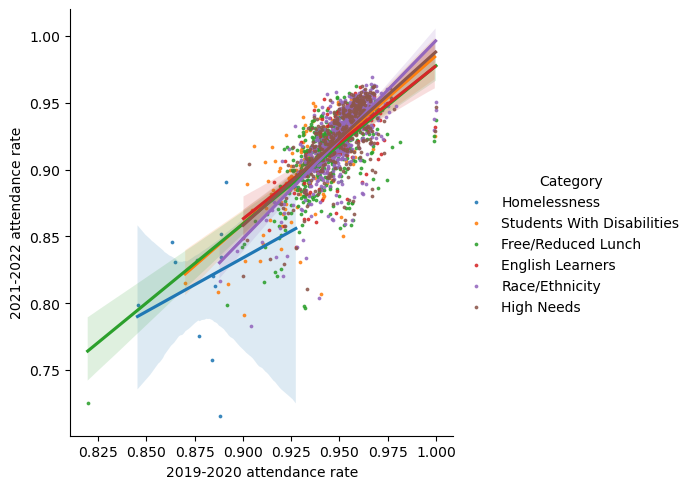

In [76]:
sns.lmplot(
    data=school,
    x='2019-2020 attendance rate',
    y='2021-2022 attendance rate',
    hue='Category',
    scatter_kws={'s':3},
    #line_kws={'s':1}
)